# <center>Expérimentations</center>

In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


plt.ion()
parismap = mpimg.imread('data/paris-48.806-2.23--48.916-2.48.jpg')

## coordonnees GPS de la carte
xmin,xmax = 2.23,2.48   ## coord_x min et max
ymin,ymax = 48.806,48.916 ## coord_y min et max

def show_map():
    plt.imshow(parismap,extent=[xmin,xmax,ymin,ymax],aspect=1.5)
    ## extent pour controler l'echelle du plan

poidata = pickle.load(open("data/poi-paris.pkl","rb"))
## liste des types de point of interest (poi)
print("Liste des types de POI" , ", ".join(poidata.keys()))

## Choix d'un poi
typepoi = "atm"

Liste des types de POI furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar


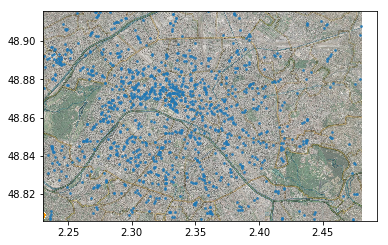

In [2]:
## Creation de la matrice des coordonnees des POI
geo_mat = np.zeros((len(poidata[typepoi]),2))
for i,(k,v) in enumerate(poidata[typepoi].items()):
    geo_mat[i,:]=v[0]

## Affichage brut des poi
show_map()
## alpha permet de regler la transparence, s la taille
plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.8,s=3)

<center> <h1> Histogramme </h1></center>

In [3]:
class Histogram:
    data=''
    def __init__(self, xmin, xmax, ymin, ymax, steps):
        self.xmin=xmin
        self.ymin=ymin
        self.xmax=xmax
        self.ymax=ymax
        self.steps = steps
        
    def predict(self):
        res=np.zeros((steps,steps))
        xstep=(xmax-xmin)/steps
        ystep=(ymax-ymin)/steps
        for yi,xi in self.data:
            res[int((xi-xmin)/xstep)][int((yi-ymin)/ystep)]+=1
        return res/np.sum(res)


In [4]:
# discretisation pour l'affichage des modeles d'estimation de densite
steps = 4
xx,yy = np.meshgrid(np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps))
grid = np.c_[xx.ravel(),yy.ravel()]


In [6]:
h=Histogram(xmin, xmax, ymin, ymax, steps)
h.data=geo_mat
res_histo = h.predict()

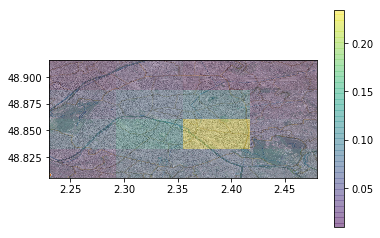

In [7]:
plt.figure()
show_map()
plt.imshow(res_histo,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()
#plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.3)

In [8]:
# discretisation pour l'affichage des modeles d'estimation de densite
steps = 20
xx,yy = np.meshgrid(np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps))
grid = np.c_[xx.ravel(),yy.ravel()]

h=Histogram(xmin, xmax, ymin, ymax, steps)
h.data=geo_mat
res_histo = h.predict()

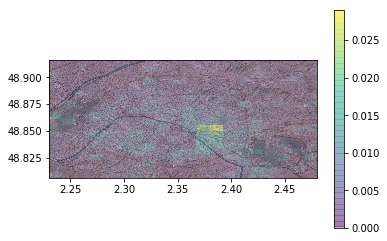

In [9]:
plt.figure()
show_map()
plt.imshow(res_histo,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()
#plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.3)

In [10]:
# discretisation pour l'affichage des modeles d'estimation de densite
steps = 100
xx,yy = np.meshgrid(np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps))
grid = np.c_[xx.ravel(),yy.ravel()]

h=Histogram(xmin, xmax, ymin, ymax, steps)
h.data=geo_mat
res_histo = h.predict()

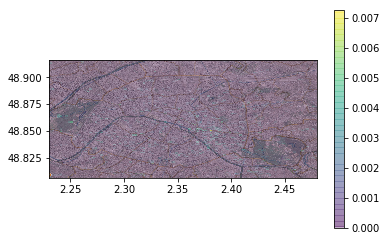

In [11]:
plt.figure()
show_map()
plt.imshow(res_histo,extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()
#plt.scatter(geo_mat[:,1],geo_mat[:,0],alpha=0.3)

In [10]:
steps = 50
xx,yy = np.meshgrid(np.linspace(xmin,xmax,steps),np.linspace(ymin,ymax,steps))
grid = np.c_[xx.ravel(),yy.ravel()]
grid[:,0].shape
a= np.zeros(shape=(2500,    2))
a[:,0]=grid[:,1]
a[:,1]=grid[:,0]


<center> <h1> Parzen</h1></center>

In [5]:
class Parzen:
    def __init__(self, h):
        self.h= h
        
    def predict(self,datax,grid):
        result = np.zeros(len(grid))
        N=len(datax)
        D=datax[0].shape[0]
        hD=np.power(self.h,D)       
        i=0
        for x in grid:
            K=self.k((x-datax)/self.h)[0]
            result[i]=(1/N)*np.sum((1/hD)*K)
            i+=1
        return result
                          
    def k(self,points):
        N=len(points)
        result= np.zeros(shape=(1,N))
        i=0
        for d in points:
            if (np.abs(d[0]) <= 0.1) and (np.abs(d[1]) <= 0.1):
                result[0][i]=1
            else:
                result[0][i]=0
            i+=1
        return result

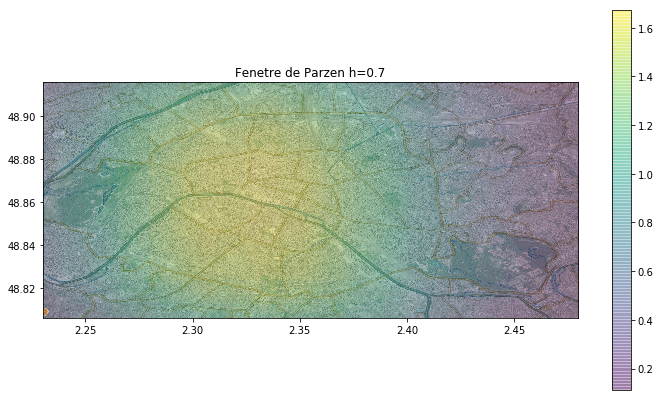

In [30]:
dn=Parzen(0.7) #page 124 pattern recognition
r=dn.predict(geo_mat,a)
steps=50
plt.figure(figsize = (12,7))
show_map()
plt.title('Fenetre de Parzen h=0.7')
plt.imshow(r.reshape(steps,steps),extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()


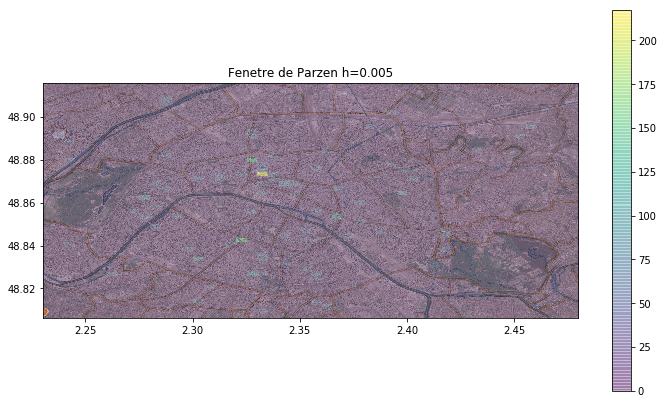

In [29]:
dn=Parzen(0.005) #page 124 pattern recognition
r=dn.predict(geo_mat,a)
steps=50
plt.figure(figsize = (12,7))
show_map()
plt.title('Fenetre de Parzen h=0.005')
plt.imshow(r.reshape(steps,steps),extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()

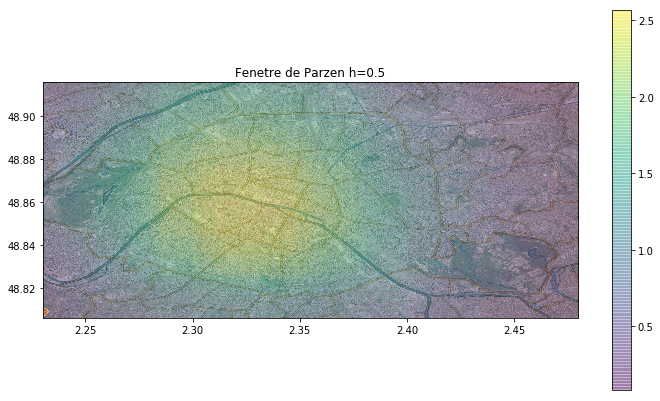

In [13]:
dn=Parzen(0.5) #page 124 pattern recognition
r=dn.predict(geo_mat,a)
steps=50
plt.figure(figsize = (12,7))
show_map()
plt.title('Fenetre de Parzen h=0.5')
plt.imshow(r.reshape(steps,steps),extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()

<center> <h1> Gauss</h1></center>

In [6]:
class Gauss:
    def __init__(self, h):
        self.h= h
        
    def predict(self,datax,grid):
        result = np.zeros(len(grid))
        N=len(datax)
        D=datax[0].shape[0]
        hD=np.power(self.h,D)       
        i=0
        for x in grid:
            K=self.k((x-datax)[0])[0]
            result[i]=(1/N)*np.sum((1/(np.power(2*np.pi*np.power(self.h,2),D/2)))*K)
            i+=1
        return result
        
    def k(self,points):
        N=len(points)
        result= np.zeros(shape=(1,N))
        i=0
        for point in points:
            result[0][i]=np.exp(-(np.power(np.abs(point),2))/(2*np.power(self.h,2)))
            i+=1
        return result

In [16]:
dn=Gauss(0.5) #page 124 pattern recognition
r1=dn.predict(geo_mat,a)

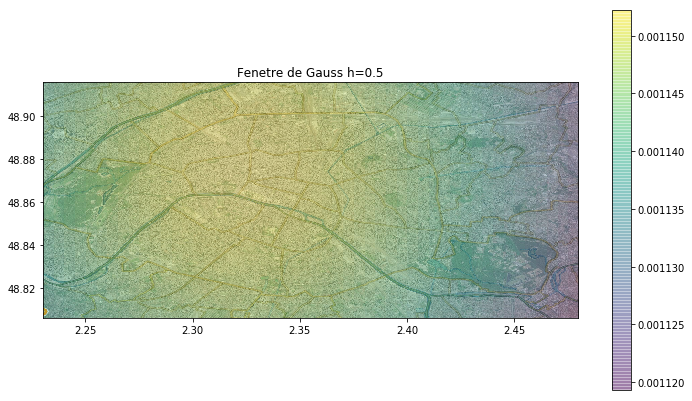

In [17]:
steps=50
plt.figure(figsize = (12,7))
show_map()
plt.title('Fenetre de Gauss h=0.5')
plt.imshow(r1.reshape(steps,steps),extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()

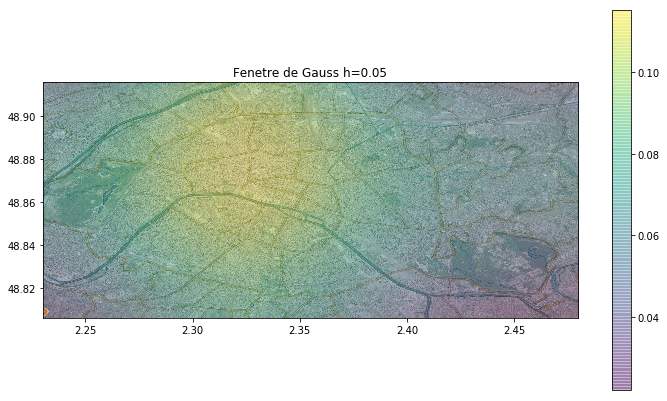

In [21]:
dn=Gauss(0.05) #page 124 pattern recognition
r=dn.predict(geo_mat,a)
steps=50
plt.figure(figsize = (12,7))
show_map()
plt.title('Fenetre de Gauss h=0.05')
plt.imshow(r.reshape(steps,steps),extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()

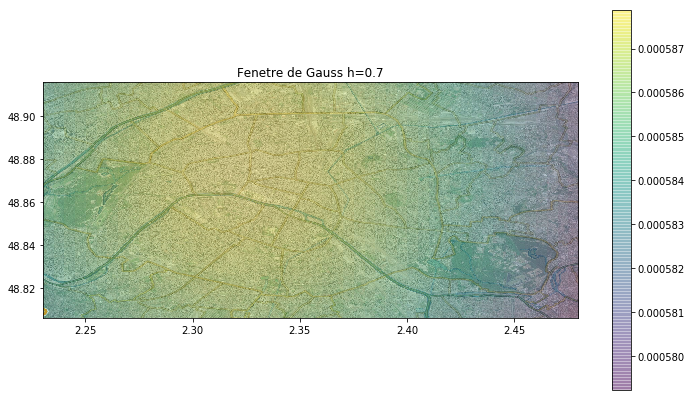

In [26]:
dn=Gauss(0.7) #page 124 pattern recognition
r=dn.predict(geo_mat,a)
steps=50
plt.figure(figsize = (12,7))
show_map()
plt.title('Fenetre de Gauss h=0.7')
plt.imshow(r.reshape(steps,steps),extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()

<center> <h1> Calcul du paramètre h* </h1></center>

In [17]:
def hStar(X):
    s =(np.array([np.linalg.norm(g) for g in X])).std()
    return 1.06 * s * len(X) ** (1.0/5.0)

h_star = hStar(geo_mat)
print("h*: ",h_star)

h*:  0.11048231086658776


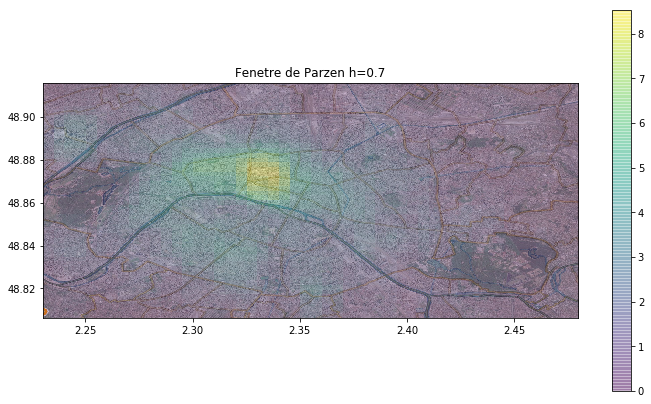

In [20]:
dn=Parzen(h_star) #page 124 pattern recognition
r=dn.predict(geo_mat,a)
steps=50
plt.figure(figsize = (12,7))
show_map()
plt.title('Fenetre de Parzen h=0.7')
plt.imshow(r.reshape(steps,steps),extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()

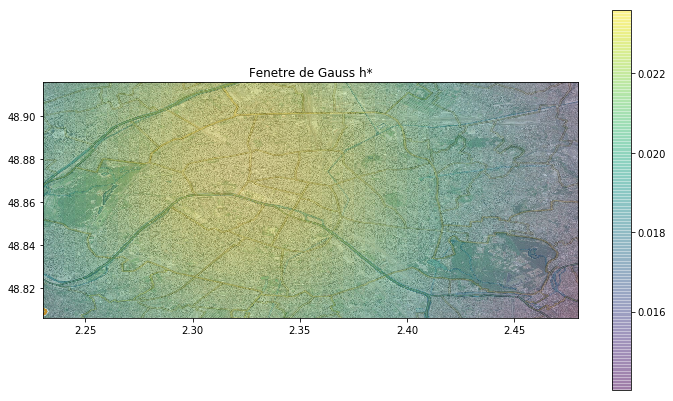

In [19]:
dn=Gauss(h_star) #page 124 pattern recognition
r=dn.predict(geo_mat,a)
steps=50
plt.figure(figsize = (12,7))
show_map()
plt.title('Fenetre de Gauss h*')
plt.imshow(r.reshape(steps,steps),extent=[xmin,xmax,ymin,ymax],interpolation='none',\
               alpha=0.3,origin = "lower")
plt.colorbar()